In [1]:
# core layer models 
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM # lstm class model 
from keras.models import Sequential # load sequential model 
import lstm # helper library 
import time # helper lib for time calculation
import matplotlib.pyplot as plt # plotting lib 

%matplotlib inline

Using TensorFlow backend.


## Step1- Load Data set 

In [2]:
X_train, y_train, X_test, y_test = lstm.load_data(filename='sp500.csv', seq_len=50, normalise_window=True)

## Step2- Build Model 

In [3]:
# making a sequential model 
model  = Sequential()

# adding a lstm layer 
model.add(LSTM(input_dim = 1, output_dim = 50, return_sequences=True))

# adding a drop out layer 
model.add(Dropout(0.2)) # 20% 

# adding a lstm layer 2 
model.add(LSTM(100, return_sequences=False))

# adding a drop out of 20% 
model.add(Dropout(0.2))

# adding a dense layer 
model.add(Dense(1))

# adding a activation layer 
model.add(Activation('linear'))

# compile model 
start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print("Compilation Time : ",time.time() - start)

Compilation Time :  0.027646303176879883


## Train our model 

In [4]:
# fitting our model
model.fit(X_train, y_train, batch_size=512, epochs=2, validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/2
3523/3523 [==============================] - 8s 2ms/step - loss: 0.0029 - val_loss: 0.0010
Epoch 2/2
3523/3523 [==============================] - 5s 1ms/step - loss: 7.7623e-04 - val_loss: 7.8012e-04


## Plot Values 

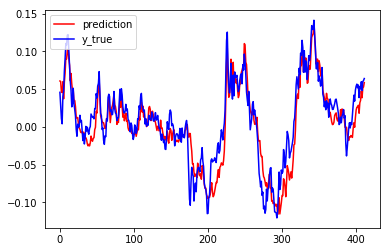

In [5]:
# predict test values 
pred = model.predict(X_test, batch_size=512)

# plotting our results 
plt.plot(pred, color='red', label='prediction')
plt.plot(y_test, color='blue', label='y_true')
plt.legend(loc='upper left')
plt.show()